In [1]:
import sys 
import os
import pandas as pd
from pathlib import Path
sys.path.insert(0, str(Path.cwd().parent))
from utils.utils import save_experiment, evaluate_model_on_parquet, grid_search_joblib, train_and_evaluate_non_linear_svm
from configs.config_local import FEATURES_DIR, ITW_DATASET_PATH, MODELS_PATH
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:

train_data_path = os.path.join(FEATURES_DIR, "training_features_mean_20_128_256_128.parquet")
val_data_path = os.path.join(FEATURES_DIR, "testing_features_mean_20_128_256_128.parquet")
test_data_path = os.path.join(ITW_DATASET_PATH, 'normalized_features', "itw_features_mean_20_128_256_128_trimmed_loudness_normalized.parquet")


model = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(
        class_weight={0: 1, 1: 5},
        cache_size=2000,
        random_state=42
    )),
])


### RBF Kernel

In [3]:
param_grid_rbf = {
    "svm__kernel": ["rbf"],
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": ["scale", 0.01, 0.1],
}

final_model_rbf, test_metrics_rbf, val_metrics_rbf, best_params_rbf, val_results_rbf, metadata_rbf, feature_names_rbf = grid_search_joblib(
                                                                                                                                model,
                                                                                                                                param_grid_rbf,
                                                                                                                                train_data_path,
                                                                                                                                val_data_path,
                                                                                                                                test_data_path,
                                                                                                                                n_jobs=5
                                                                                                                            )
print(f'Best parameters:{best_params_rbf}')
print(f'Resluts on validation data:{val_metrics_rbf}')
print(f'Resluts on test data:{test_metrics_rbf}')

save_experiment(
    model=final_model_rbf,
    metrics=test_metrics_rbf,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments", "rbf_svm"),
    model_params=best_params_rbf,
    feature_names=feature_names_rbf,
    metadata_extra=metadata_rbf,
)

Number of fits: 12 with n_jobs=5 parallel jobs


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  6.1min
[Parallel(n_jobs=5)]: Done   5 out of  12 | elapsed:  7.4min remaining: 10.4min
[Parallel(n_jobs=5)]: Done   7 out of  12 | elapsed: 12.3min remaining:  8.8min
[Parallel(n_jobs=5)]: Done   9 out of  12 | elapsed: 38.2min remaining: 12.7min
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed: 58.0min finished


[1] {'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'} | val_acc=0.7555 | val_f1=0.7545
[2] {'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'} | val_acc=0.7611 | val_f1=0.7607
[3] {'svm__C': 0.1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'} | val_acc=0.5142 | val_f1=0.3455
[4] {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'} | val_acc=0.6655 | val_f1=0.6427
[5] {'svm__C': 1, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'} | val_acc=0.6774 | val_f1=0.6586
[6] {'svm__C': 1, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'} | val_acc=0.6155 | val_f1=0.5431
[7] {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'} | val_acc=0.6075 | val_f1=0.5549
[8] {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'} | val_acc=0.6465 | val_f1=0.6171
[9] {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'} | val_acc=0.6265 | val_f1=0.5612
[10] {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'} | val_acc=0.6090 | val_f1=0.5571
[11] {'svm__C': 100, 'svm__gamma': 0.01, 'svm__ke

'c:\\Users\\Konstantinos\\Documents\\GitHub\\audio-deepfake-detection\\notebooks\\experiments\\rbf_svm\\exp_20260131_233334'

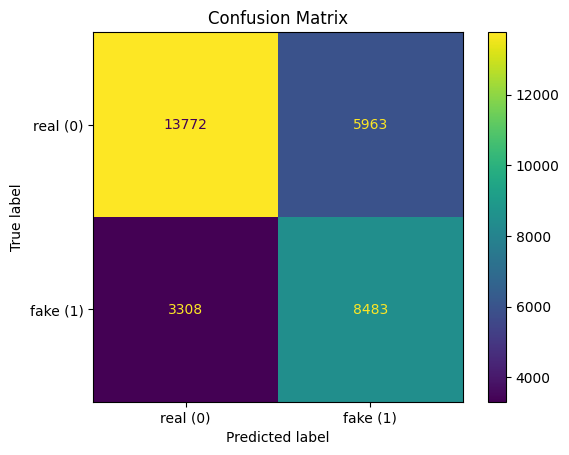

{'accuracy': 0.7059252680327349, 'precision': 0.5872213761594905, 'recall': 0.7194470358748197, 'f1_macro': 0.6974086756098159, 'roc_auc': 0.7631115761062472}


In [4]:

metrics, metadata_extra = evaluate_model_on_parquet(final_model_rbf, test_data_path, plots=True)
print(metrics)


### Polynomial Kernel

In [5]:
param_grid_poly = {
    "svm__kernel": ["poly"],
    "svm__degree": [2, 3],
    "svm__C": [0.1, 1, 10],
    "svm__gamma": ["scale", 0.01],
    "svm__coef0": [0.0, 1.0],
}

final_model_poly, test_metrics_poly, val_metrics_poly, best_params_poly, val_results_poly, metadata_poly, feature_names_poly = grid_search_joblib(
                                                                                                                                model,
                                                                                                                                param_grid_poly,
                                                                                                                                train_data_path,
                                                                                                                                val_data_path,
                                                                                                                                test_data_path,
                                                                                                                                n_jobs=5
                                                                                                                            )
print(f'Best parameters:{best_params_poly}')
print(f'Resluts on validation data:{val_metrics_poly}')
print(f'Resluts on test data:{test_metrics_poly}')

save_experiment(
    model=final_model_poly,
    metrics=test_metrics_poly,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments", "poly_svm"),
    model_params=best_params_poly,
    feature_names=feature_names_poly,
    metadata_extra=metadata_poly,
)

Number of fits: 24 with n_jobs=5 parallel jobs


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  6.0min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  7.9min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed: 11.0min
[Parallel(n_jobs=5)]: Done  18 out of  24 | elapsed: 12.2min remaining:  4.1min
[Parallel(n_jobs=5)]: Done  21 out of  24 | elapsed: 12.7min remaining:  1.8min
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed: 12.9min finished


[1] {'svm__C': 0.1, 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'poly'} | val_acc=0.6096 | val_f1=0.6057
[2] {'svm__C': 0.1, 'svm__coef0': 0.0, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'poly'} | val_acc=0.7024 | val_f1=0.7015
[3] {'svm__C': 0.1, 'svm__coef0': 0.0, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'poly'} | val_acc=0.4825 | val_f1=0.3867
[4] {'svm__C': 0.1, 'svm__coef0': 0.0, 'svm__degree': 3, 'svm__gamma': 0.01, 'svm__kernel': 'poly'} | val_acc=0.5811 | val_f1=0.5475
[5] {'svm__C': 0.1, 'svm__coef0': 1.0, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'poly'} | val_acc=0.7400 | val_f1=0.7400
[6] {'svm__C': 0.1, 'svm__coef0': 1.0, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'poly'} | val_acc=0.7054 | val_f1=0.6974
[7] {'svm__C': 0.1, 'svm__coef0': 1.0, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'poly'} | val_acc=0.6791 | val_f1=0.6674
[8] {'svm__C': 0.1, 'svm__coef0': 1.0, 'svm__degree': 3, 

'c:\\Users\\Konstantinos\\Documents\\GitHub\\audio-deepfake-detection\\notebooks\\experiments\\poly_svm\\exp_20260131_235033'

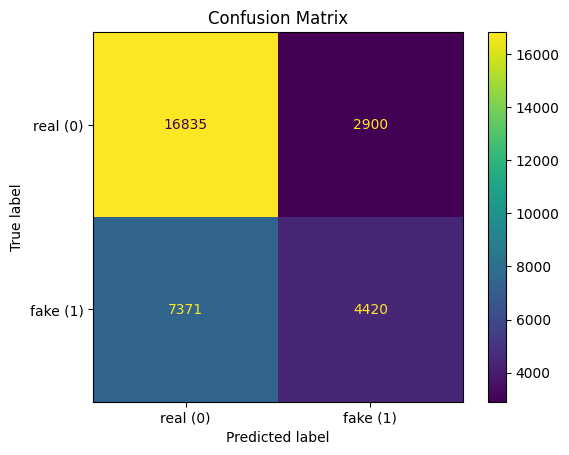

{'accuracy': 0.6742054177504282, 'precision': 0.6038251366120219, 'recall': 0.3748621830209482, 'f1_macro': 0.6144077897652256, 'roc_auc': 0.690650749261744}


In [6]:

metrics, metadata_extra = evaluate_model_on_parquet(final_model_poly, test_data_path, plots=True)
print(metrics)


### Sigmoid Kernel

In [7]:
param_grid_sigmoid = {
    "svm__kernel": ["sigmoid"],
    "svm__C": [0.01, 0.1, 1],
    "svm__gamma": ["scale", 0.01],
    "svm__coef0": [-1.0, 0.0, 1.0],
}


final_model_sigmoid, test_metrics_sigmoid, val_metrics_sigmoid, best_params_sigmoid, val_results_sigmoid, metadata_sigmoid, feature_names_sigmoid = grid_search_joblib(
                                                                                                                                model,
                                                                                                                                param_grid_sigmoid,
                                                                                                                                train_data_path,
                                                                                                                                val_data_path,
                                                                                                                                test_data_path,
                                                                                                                                n_jobs=5
                                                                                                                            )
print(f'Best parameters:{best_params_sigmoid}')
print(f'Resluts on validation data:{val_metrics_sigmoid}')
print(f'Resluts on test data:{test_metrics_sigmoid}')

save_experiment(
    model=final_model_sigmoid,
    metrics=test_metrics_sigmoid,
    experiment_dir=os.path.join(sys.path[0], "notebooks", "experiments", "sigmoid_svm"),
    model_params=best_params_sigmoid,
    feature_names=feature_names_sigmoid,
    metadata_extra=metadata_sigmoid,
)

Number of fits: 18 with n_jobs=5 parallel jobs


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed: 13.2min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 21.0min
[Parallel(n_jobs=5)]: Done  11 out of  18 | elapsed: 24.3min remaining: 15.5min
[Parallel(n_jobs=5)]: Done  13 out of  18 | elapsed: 32.1min remaining: 12.3min
[Parallel(n_jobs=5)]: Done  15 out of  18 | elapsed: 32.6min remaining:  6.5min
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 37.2min finished


[1] {'svm__C': 0.01, 'svm__coef0': -1.0, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'} | val_acc=0.5334 | val_f1=0.3882
[2] {'svm__C': 0.01, 'svm__coef0': -1.0, 'svm__gamma': 0.01, 'svm__kernel': 'sigmoid'} | val_acc=0.5766 | val_f1=0.5033
[3] {'svm__C': 0.01, 'svm__coef0': 0.0, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'} | val_acc=0.5451 | val_f1=0.4179
[4] {'svm__C': 0.01, 'svm__coef0': 0.0, 'svm__gamma': 0.01, 'svm__kernel': 'sigmoid'} | val_acc=0.5537 | val_f1=0.4454
[5] {'svm__C': 0.01, 'svm__coef0': 1.0, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'} | val_acc=0.5227 | val_f1=0.3652
[6] {'svm__C': 0.01, 'svm__coef0': 1.0, 'svm__gamma': 0.01, 'svm__kernel': 'sigmoid'} | val_acc=0.5259 | val_f1=0.3722
[7] {'svm__C': 0.1, 'svm__coef0': -1.0, 'svm__gamma': 'scale', 'svm__kernel': 'sigmoid'} | val_acc=0.7268 | val_f1=0.7137
[8] {'svm__C': 0.1, 'svm__coef0': -1.0, 'svm__gamma': 0.01, 'svm__kernel': 'sigmoid'} | val_acc=0.5719 | val_f1=0.5306
[9] {'svm__C': 0.1, 'svm__coef0': 

'c:\\Users\\Konstantinos\\Documents\\GitHub\\audio-deepfake-detection\\notebooks\\experiments\\sigmoid_svm\\exp_20260201_003248'

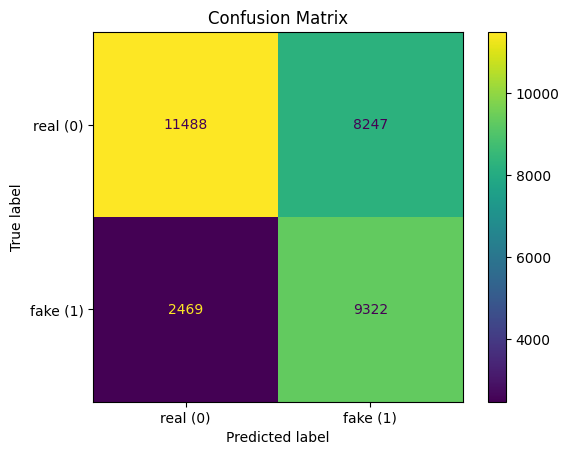

{'accuracy': 0.6600900843748018, 'precision': 0.5305936592862428, 'recall': 0.7906030022898821, 'f1_macro': 0.6584779624105659, 'roc_auc': 0.7038060595830038}


In [8]:
metrics, metadata_extra = evaluate_model_on_parquet(final_model_sigmoid, test_data_path, plots=True)
print(metrics)
